# Análisis Financiero

In [1]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo
file_path = r"D:\Python\Credit Card Fraud Detection\archive\creditcard.csv"
df = pd.read_csv(file_path)

In [3]:
# Mostrar las primeras filas
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Información básica del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Resumen estadístico
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709


Distribución de la variable 'Class':
Class
0    284315
1       492
Name: count, dtype: int64


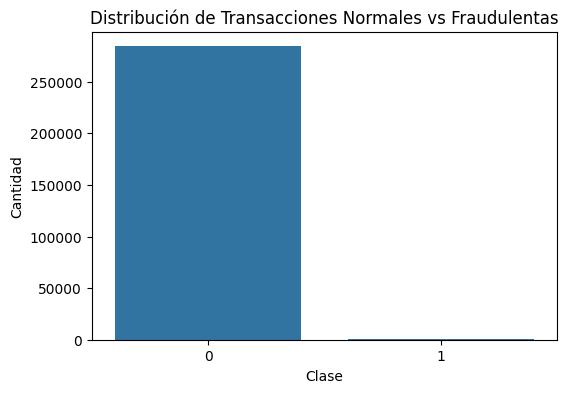

In [6]:
# Analizar la distribución de la variable objetivo
# Contar la cantidad de clases (0 y 1)
class_counts = df['Class'].value_counts()
print("\nDistribución de la variable 'Class':")
print(class_counts)

# Visualización de la distribución
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribución de Transacciones Normales vs Fraudulentas")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

In [7]:
# Verificar si hay datos nulos
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
!pip install imbalanced-learn

Distribución de clases después de SMOTE:
Counter({0: 284315, 1: 284315})


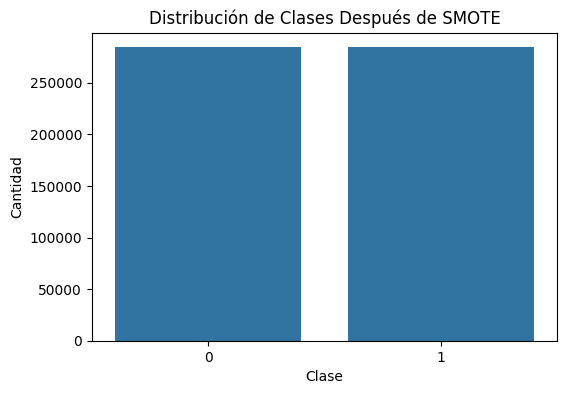

In [ ]:
# Sobremuestreo 
# Aumentar artificialmente las instancias de la clase minoritaria. Estos desbalances pueden causar problemas en los modelos ya que se ignoran las clases minoritarias
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separar las características (X) y la variable objetivo (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Aplicar SMOTE (Synthetic Minority Oversampling Technique) para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mostrar la nueva distribución de clases
print("Distribución de clases después de SMOTE:")
print(Counter(y_resampled))

# Visualizar la nueva distribución
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title("Distribución de Clases Después de SMOTE")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

In [12]:
# Entrenar un Modelo de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[56739    11]
 [    0 56976]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



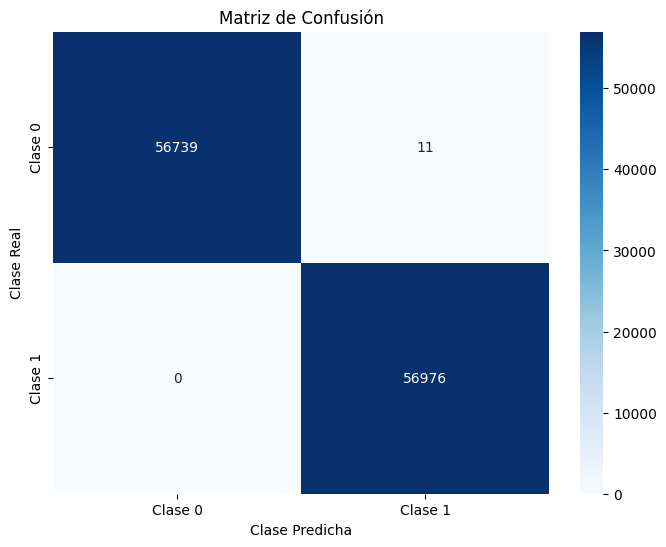

In [13]:
# Graficar la Matriz de Confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.title("Matriz de Confusión")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()

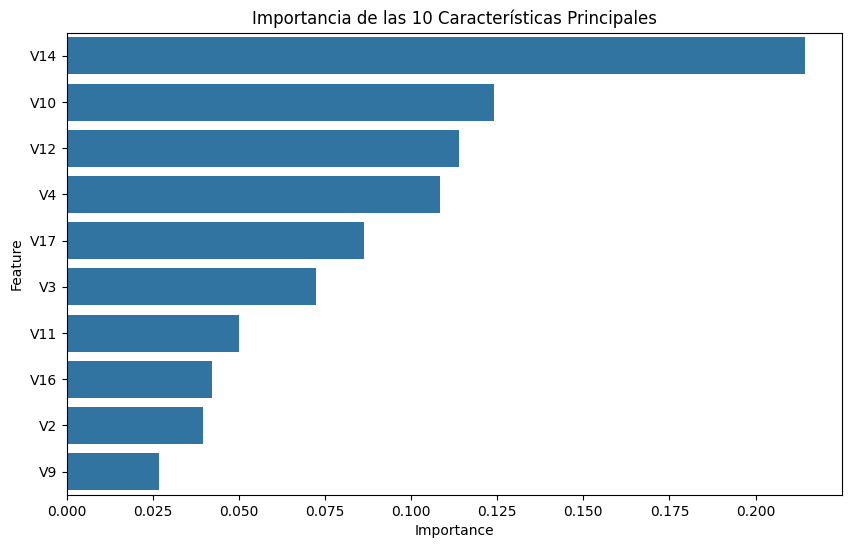

In [14]:
# Importancia de las características
importances = rf_model.feature_importances_
features = X.columns

# Crear un DataFrame ordenado
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Importancia de las 10 Características Principales")
plt.show()

In [15]:
# Realizar el Análisis de Errores
# Identificar las predicciones incorrectas
X_test_df = X_test.copy()
X_test_df['Real_Class'] = y_test
X_test_df['Predicted_Class'] = y_pred

# Filtrar los errores
errors = X_test_df[X_test_df['Real_Class'] != X_test_df['Predicted_Class']]
print("Cantidad de errores encontrados:", len(errors))
print(errors.head())

Cantidad de errores encontrados: 11
            Time         V1         V2         V3        V4         V5  \
122017   76403.0  -0.580958   1.543129  -1.192682  1.637929  -0.642161   
187657  127631.0   1.813886   0.381837  -4.023519  1.046436   1.584362   
277877  167912.0  -7.148040   3.745220  -6.459942  1.130416  -4.113022   
16110    27524.0 -26.619952  14.845545 -27.747084  6.408105 -19.025741   
164955  117109.0  -1.905682   0.913351  -2.138647 -0.456271  -3.118578   

              V6         V7         V8        V9  ...       V22       V23  \
122017  0.082969  -1.944365   1.017884 -1.732810  ... -0.329327  0.124078   
187657 -0.344732   0.177102   0.088170  1.196258  ...  0.159248 -0.439455   
277877 -1.810463  -4.973079   2.944528 -1.404826  ...  0.970935  0.580951   
16110  -5.053209 -19.041960  17.573712 -3.695863  ... -1.985567 -1.210123   
164955 -1.068693  -3.846181   1.451433 -2.545307  ...  1.067623  0.042956   

             V24       V25       V26       V27       V28

In [16]:
# Evaluación de los Nuevos Datos
# Dividir en entrenamiento, validación y prueba
X_train_full, X_test_final, y_train_full, y_test_final = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Reentrenar el modelo
rf_model.fit(X_train_full, y_train_full)

# Evaluar en el conjunto de prueba final
y_pred_final = rf_model.predict(X_test_final)
print("Reporte de Clasificación Final:")
print(classification_report(y_test_final, y_pred_final))

Reporte de Clasificación Final:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



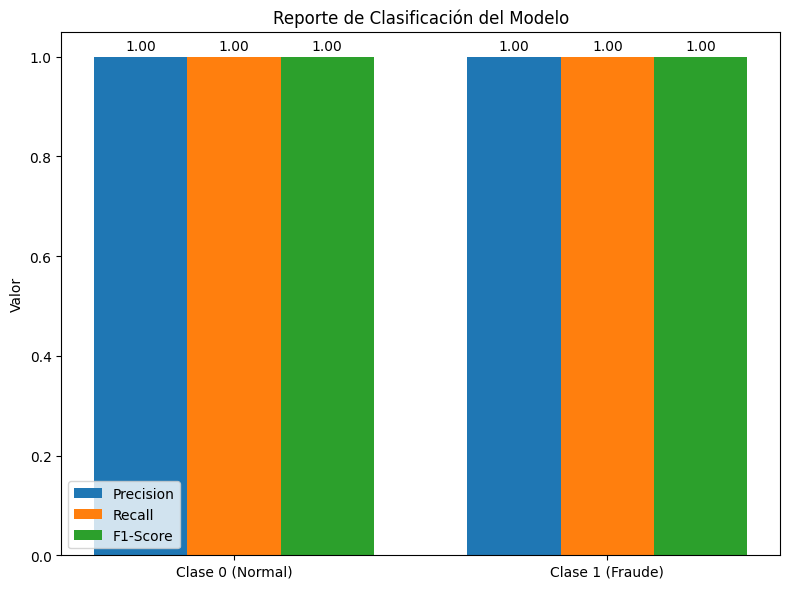

In [18]:
# Graficar el Reporte de Clasificación
import matplotlib.pyplot as plt
import numpy as np

# Datos del reporte de clasificación
classes = ['Clase 0 (Normal)', 'Clase 1 (Fraude)']
precision = [1.00, 1.00]
recall = [1.00, 1.00]
f1_score = [1.00, 1.00]

# Crear gráfico de barras
x = np.arange(len(classes))  # Posiciones en X
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width, precision, width, label='Precision')
bars2 = ax.bar(x, recall, width, label='Recall')
bars3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Configurar el gráfico
ax.set_ylabel('Valor')
ax.set_title('Reporte de Clasificación del Modelo')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Mostrar los valores encima de las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [19]:
# Validación en Datos Reales
# Crear nuevas filas similares a los datos originales
nuevos_datos = X.sample(1000, random_state=42).copy()
nuevos_datos += np.random.normal(0, 0.1, nuevos_datos.shape)  # Introducir variabilidad
print("Nuevos datos simulados:")
print(nuevos_datos.head())

# Realizar predicciones en datos nuevos
nuevas_predicciones = rf_model.predict(nuevos_datos)
nuevos_datos['Predicted_Class'] = nuevas_predicciones

# Contar las predicciones
print("\nResumen de predicciones en datos nuevos:")
print(nuevos_datos['Predicted_Class'].value_counts())

Nuevos datos simulados:
                 Time         V1        V2         V3        V4         V5  \
43428    41504.936548 -16.414756  8.584828 -18.629790  9.507514 -13.671733   
49906    44260.944210   0.402068 -2.726513  -0.112010 -1.483187  -1.350291   
29474    35484.028221   1.370972 -0.564017   0.127957 -0.984201  -0.466603   
276481  167122.992710  -0.561222  1.608008  -1.844860 -0.459330   0.785199   
278846  168472.882242   2.015109 -0.056803  -1.005207  0.319506  -0.178921   

              V6         V7        V8        V9  ...       V20       V21  \
43428  -2.890155 -16.772901  7.430931 -8.398283  ... -1.483170  1.243641   
49906   1.141344  -0.505583  0.270102  0.922363  ...  0.580474 -0.130413   
29474   0.154289  -0.710306  0.014485 -0.939545  ...  0.166327  0.118963   
276481 -0.774150   0.297512  0.511800 -0.657329  ... -0.418510  0.117193   
278846 -1.092636   0.183978 -0.085478  0.329767  ... -0.253336 -0.207109   

             V22       V23       V24       V25    

In [21]:
# Integración en Producción
import joblib

# Guardar el modelo entrenado
joblib.dump(rf_model, 'modelo_fraude.pkl')

# Cargar el modelo para pruebas
modelo_cargado = joblib.load('modelo_fraude.pkl')
print("Modelo cargado correctamente.")

Modelo cargado correctamente.


In [22]:
# Monitoreo
from datetime import datetime

# Simulación de logs de desempeño
def log_desempeno(real, pred):
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    precision = precision_score(real, pred)
    recall = recall_score(real, pred)
    f1 = f1_score(real, pred)
    
    print(f"{datetime.now()} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    
    # Aquí puedes guardar en un archivo o base de datos
    with open('log_desempeno.txt', 'a') as log:
        log.write(f"{datetime.now()} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}\n")

# Ejemplo con datos simulados
real = [0, 1, 0, 1, 1, 0, 1, 0]  # Clase real (simulada)
pred = [0, 1, 0, 1, 1, 0, 1, 1]  # Predicción (simulada)
log_desempeno(real, pred)

2024-12-08 10:46:18.138387 - Precision: 0.8000, Recall: 1.0000, F1-Score: 0.8889


C:\Users\cafef\AppData\Local\Temp\ipykernel_37420\4092790665.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X['V14'], label='Datos de Entrenamiento', shade=True)
C:\Users\cafef\AppData\Local\Temp\ipykernel_37420\4092790665.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nuevos_datos['V14'], label='Datos Nuevos', shade=True)


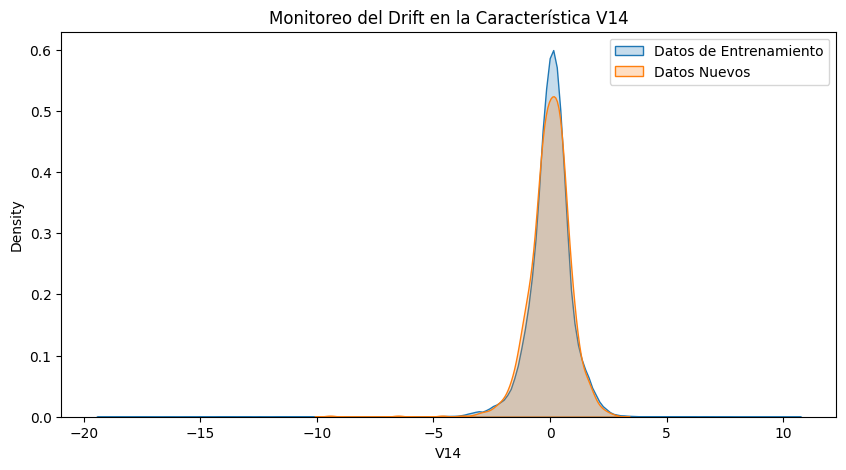

In [23]:
# Monitoreo del Drift de Datos
# Comparar la distribución de una característica
plt.figure(figsize=(10, 5))
sns.kdeplot(X['V14'], label='Datos de Entrenamiento', shade=True)
sns.kdeplot(nuevos_datos['V14'], label='Datos Nuevos', shade=True)
plt.title('Monitoreo del Drift en la Característica V14')
plt.legend()
plt.show()

In [24]:
# Optimización del Modelo
from xgboost import XGBClassifier

# Entrenar un modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
xgb_model.fit(X_train, y_train)

# Evaluar el modelo
xgb_pred = xgb_model.predict(X_test)
print("Reporte de Clasificación con XGBoost:")
print(classification_report(y_test, xgb_pred))

c:\Users\cafef\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:47:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Reporte de Clasificación con XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

